In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
# loeme andmed sisse
df_GPT35 = pd.read_csv('GPT3_5_tulemused.csv')
df_GPT35['nonsense_words'] = df_GPT35['nonsense_words'].apply(lambda x: 1 if x == 0 else 0 if x == 1 else x)
df_GPT4 = pd.read_csv('GPT4_0_tulemused.csv')
df_GPT4['nonsense_words'] = df_GPT4['nonsense_words'].apply(lambda x: 1 if x == 0 else 0 if x == 1 else x)
df_minu = pd.read_csv('minu_tulemused.csv')
df_minu = df_minu.drop(columns=['Unnamed: 0'])

In [3]:
# tõlgime minu märgenduse inglise keelde
df_minu = df_minu.rename(columns={
    "ese": "belongings",
    "riide_ese": "clothing_items",
    "jook_toit": "edibles",
    "sisse_minna": "enclosures_and_vehicles",
    "geo_lok": "geographical_locations",
    "asutus": "institutions",
    "-": "nonsense_words",
    "org_ür_fir": "organisations_and_events",  
    "isikunimi": "persons",
    "peal_seista": "platforms_and_floors",
    "suund": "spatial_directions",
    "piirkond": "spatial_region",
    "ajaperiood": "time_expressions",
    "taim": "vegetative_enclosure"
})
df_minu

,lemma,0,1,?,nonsense_words,time_expressions,institutions,belongings,geographical_locations,edibles,persons,organisations_and_events,spatial_region,clothing_items,platforms_and_floors,enclosures_and_vehicles,spatial_directions,vegetative_enclosure
0,Nõugaste,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,turbaauk,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,lillepaviljon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,transpordikomisjon,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,turismihooaeg,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,ovaalsaal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
497,softivahetus,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,Elbrus,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
499,dj,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
def calcStats(df_minu, df_gpt):
    df1 = df_minu.set_index('lemma')
    df2 = df_gpt.set_index('lemma')
    common_lemmas = df1.index.intersection(df2.index)
    df1_common = df1.loc[common_lemmas]
    df2_common = df2.loc[common_lemmas]
    
    metrics = {}
    
    for col in df2.columns:
        mask = df1_common[col].notna() & df2_common[col].notna()
        if mask.sum() == 0:
            continue
        
        y_true = df1_common.loc[mask, col]
        y_pred = df2_common.loc[mask, col]
        
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        
        metrics[col] = {
            'õigsus': accuracy,
            'täpsus': precision,
            'saagis': recall,
            'f1': f1
        }
    
    metrics_df = pd.DataFrame(metrics).T
    return metrics_df


In [5]:
results_gpt35 = calcStats(df_minu, df_GPT35)
results_gpt4o = calcStats(df_minu, df_GPT4)

In [6]:
results_gpt35 = results_gpt35.sort_values(by='f1', ascending=False)
results_gpt4o = results_gpt4o.sort_values(by='f1', ascending=False)



In [7]:
print("Tulemused GPT 3.5: ")
print(results_gpt35)
print("\n")
print("Tulemused GPT 4.o: ")
print(results_gpt4o)

Tulemused GPT 3.5: 
                            õigsus    täpsus    saagis        f1
nonsense_words            0.821206  0.410448  0.887097  0.561224
time_expressions          0.902335  0.285714  0.727273  0.410256
geographical_locations    0.734607  0.254658  0.891304  0.396135
persons                   0.881104  0.239437  0.894737  0.377778
platforms_and_floors      0.771310  0.230769  0.750000  0.352941
enclosures_and_vehicles   0.666667  0.211340  0.854167  0.338843
organisations_and_events  0.633333  0.165049  0.894737  0.278689
belongings                0.648649  0.125654  0.923077  0.221198
spatial_region            0.781705  0.119658  0.875000  0.210526
institutions              0.697917  0.070968  0.916667  0.131737
edibles                   0.833680  0.036145  1.000000  0.069767
clothing_items            0.841996  0.026316  0.500000  0.050000
vegetative_enclosure      0.792100  0.019802  0.666667  0.038462
spatial_directions        0.853503  0.014286  1.000000  0.028169


Tul

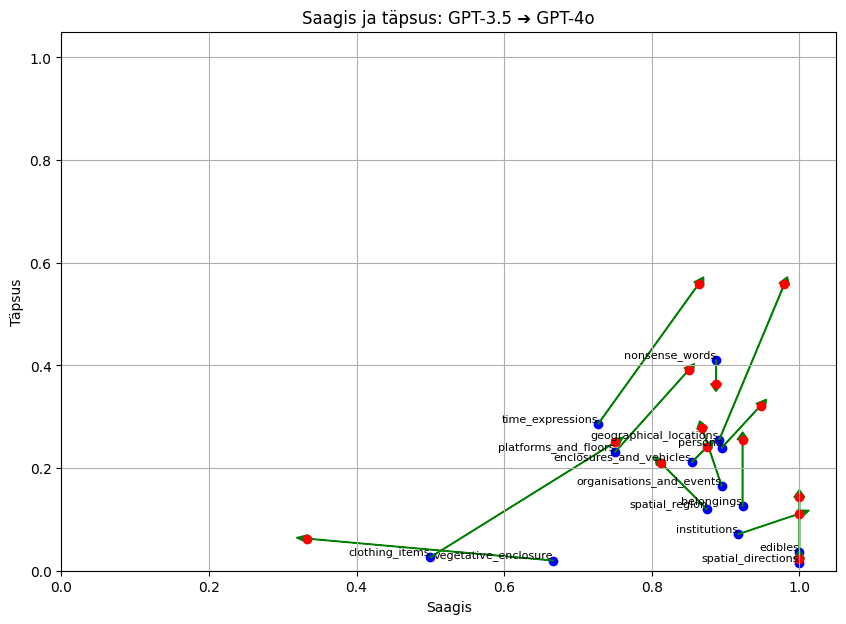

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))

for label in results_gpt35.index:
    recall_35 = results_gpt35.loc[label, 'saagis']
    precision_35 = results_gpt35.loc[label, 'täpsus']
    
    recall_4o = results_gpt4o.loc[label, 'saagis']
    precision_4o = results_gpt4o.loc[label, 'täpsus']
    
    plt.scatter(recall_35, precision_35, color='blue')
    plt.text(recall_35, precision_35, label, fontsize=8, ha='right', va='bottom')
   
    plt.arrow(recall_35, precision_35,
              recall_4o - recall_35,
              precision_4o - precision_35,
              head_width=0.015, head_length=0.015, fc='green', ec='green')


for label in results_gpt4o.index:
    recall_4o = results_gpt4o.loc[label, 'saagis']
    precision_4o = results_gpt4o.loc[label, 'täpsus']
    
    plt.scatter(recall_4o, precision_4o, color='red')

plt.xlabel('Saagis')
plt.ylabel('Täpsus')
plt.title('Saagis ja täpsus: GPT-3.5 ➔ GPT-4o')
plt.grid(True)
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.show()